<a href="https://colab.research.google.com/github/joeyMckinney/DS-Unit-1-Sprint-2-Statistics/blob/master/module%203/Josiah_McKiiney_LS_DS_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [30]:
import numpy as np
from scipy.stats import chisquare
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv')
print(df.shape)
df.head()

(2761, 15)


,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent


**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [20]:
sample1 = df.sample(20, random_state=42)
sample1.shape

(20, 15)

In [21]:
smaple2 = df.sample(200, random_state=42)
smaple2.shape

(200, 15)

**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [22]:
sample1['ConvertedSalary'].mean()

55752.2

In [23]:
smaple2['ConvertedSalary'].mean()

68551.255

**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

i trust the one with 200 samples because the higher your sample size the better close the mean will be to the mean of the pool. i asssume a non technical audience would not have any idea about which of these balues is more trustworthy.

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

because the smaller sample size is so differnet from the larger one i can infer that is because when you have a smaller sample size your margin of error is greater.

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



show a graph with the confidence intervals around the sample's mean and show the diffferece.

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [24]:
def confidence_interval(sample, confidence_level=.95):
  #turn any sample to a numpy array for consistency
  data = np.array(sample)

  #sample standard deviation (ddof=1) with numpy to get sample metrics
  s = np.std(data, ddof=1)
  n = data.shape[0]
  x_bar = np.mean(data)

  #get the t statistic that correspons to our sample size and confidence level
  t = stats.t.ppf(1 - ((1 - confidence_level) / 2), n - 1)
  #standard error
  std_err = (s / np.sqrt(n))
  #margin of error
  moe = t*std_err

  lower_bound = x_bar - moe
  upper_bound = x_bar + moe

  return (lower_bound, x_bar, upper_bound, moe)


In [25]:
ci1 = confidence_interval(sample1['ConvertedSalary'])
ci1

(35805.10309625536, 55752.2, 75699.29690374463, 19947.096903744638)

In [26]:
ci2 = confidence_interval(smaple2['ConvertedSalary'])
ci2

(60593.058804479086, 68551.255, 76509.45119552092, 7958.196195520917)

**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distriution of sample means so if our standard error is larger, our confidence interval will be wider as well.

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [27]:
mean_sample_1 = ci1[1]
moe_1 = ci1[3]

print('the mean for smaple 1 is:', mean_sample_1)
print('the margin of error for sample 2 is:', moe_1)

the mean for smaple 1 is: 55752.2
the margin of error for sample 2 is: 19947.096903744638


In [28]:
mean_sample_2 = ci2[1]
moe_2 = ci2[3]

print('the mean for smaple 1 is:', mean_sample_2)
print('the margin of error for sample 2 is:', moe_2)

the mean for smaple 1 is: 68551.255
the margin of error for sample 2 is: 7958.196195520917


The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads). in other words the margin is how far are mean can be off + or - the margin of error

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

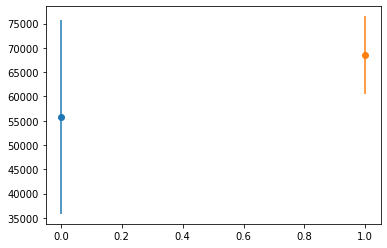

In [33]:
plt.errorbar(0, ci1[1], yerr=ci1[3], fmt='o')
plt.errorbar(1, ci2[1], yerr=ci2[3], fmt='o')
plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

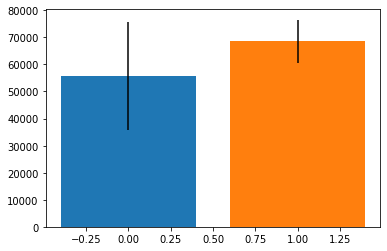

In [34]:
plt.bar(0, height=ci1[1], yerr=ci1[3])
plt.bar(1, height=ci2[1], yerr=ci2[3])
plt.show()

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [35]:
ci3 = confidence_interval(df['ConvertedSalary'])
ci3

(71299.82986224785, 73453.40420137631, 75606.97854050477, 2153.574339128457)

<BarContainer object of 1 artists>

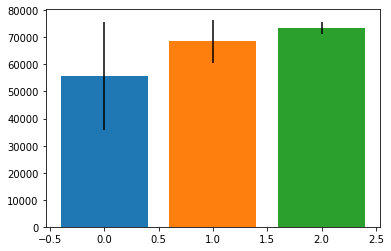

In [36]:
plt.bar(0, height=ci1[1], yerr=ci1[3])
plt.bar(1, height=ci2[1], yerr=ci2[3])
plt.bar(2, height=ci3[1], yerr=ci3[3])

as you can see in the bar graph the smaller the black line is the more precise are estimate gets. the blue bar is are small sample size of 20, the orange is are sample size of 200 and the green is the entire dataset. the higher amount of data we have the closer we get to having the actual mean with a smaller margin of error.

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

so precision is related to our margin of error or confidence interval. the smaller or tighter we can get those the more precision we have. And accuracy is how close we are to the population value. the higher our accuracy the closer we are to being on the money.

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

the 95% confidence interval says that we are 95% confident that our test results are accurate beased on the sample that we are given. leaving a 5% chance that we are off on our test results of the sample. but it dose not mean that we are 95% confident that our tests represent the who population. it is just an estimate of the population mean is from the sample we got. we could be unlucky and get a smaple with outlier data

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.